### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

                country  beer_servings  spirit_servings  wine_servings  \
15              Belarus            142              373             42   
98            Lithuania            343              244             56   
3               Andorra            245              138            312   
68              Grenada            199              438             28   
61               France            127              151            370   
45       Czech Republic            361              170            134   
141  Russian Federation            247              326             73   
99           Luxembourg            236              133            271   
155            Slovakia            196              293            116   
81              Ireland            313              118            165   

     total_litres_of_pure_alcohol  
15                           14.4  
98                           12.9  
3                            12.4  
68                           11.9  
61   

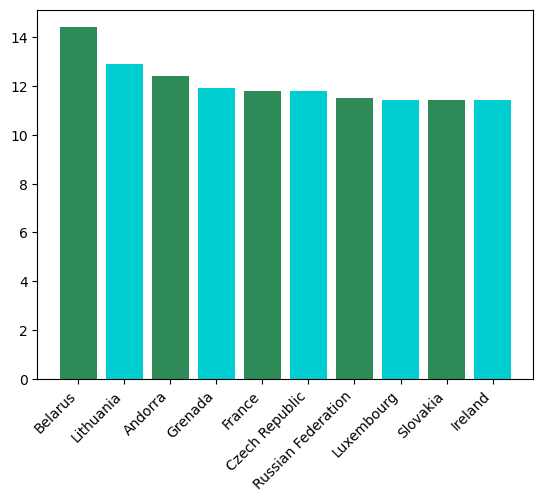

<Axes: >

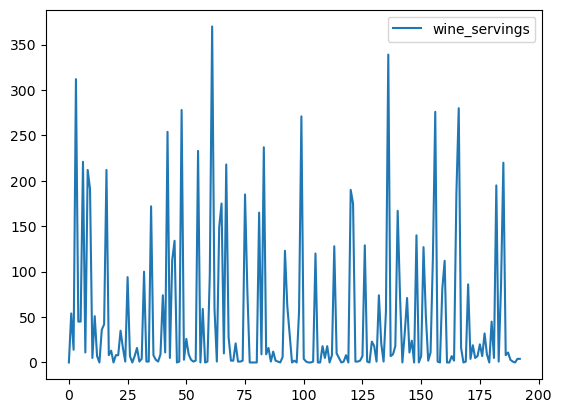

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

primi_10 = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False, inplace=False).head(10)

print(primi_10)

print("\nMedia del consumo di birra: {}".format(df.beer_servings.mean()))
print("\nMedia del consumo di vino: {}".format(df.wine_servings.mean()))
print("\nMedia del consumo di distillati: {}".format(df.spirit_servings.mean()))

df['alcohol_index'] = (df.beer_servings + df.wine_servings + df.spirit_servings) / 3

print(df.head())

print("\nPaese con il valore massimo di alcohol_index: {}".format(df.country[df['alcohol_index'].idxmax()]))

print("\nPaesi che consumano piu' di 100 birre all'anno:\n{}".format(df.country[df['beer_servings'] > 100]))

plt.bar(primi_10['country'], primi_10['total_litres_of_pure_alcohol'], color=[mcolors.CSS4_COLORS['seagreen'], mcolors.CSS4_COLORS['darkturquoise']])
plt.xticks(rotation=45, ha='right')
plt.show()

df.sort_values(by='country')
df.plot(kind='line', y='wine_servings')

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

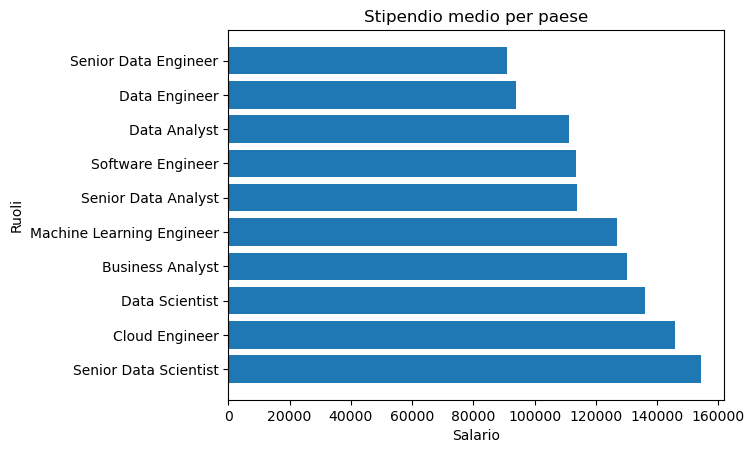

In [16]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.groupby('job_location')['salary_year_avg'].mean()
df.groupby('job_location')['job_title_short'].count()
df.groupby('job_location').agg(
    min_salary = ('salary_year_avg', 'min'),
    max_salary = ('salary_year_avg', 'max')
)

df_for_graph = pd.DataFrame()

df_for_graph['salary_year_avg'] = df.groupby('job_title_short')['salary_year_avg'].mean()
df_for_graph['job_title_short'] = df['job_title_short'].unique()
df_for_graph.sort_values(by='salary_year_avg', ascending=False, inplace=True)

plt.barh(df_for_graph['job_title_short'], df_for_graph['salary_year_avg'])
plt.title("Stipendio medio per paese")
plt.xlabel("Salario")
plt.ylabel("Ruoli")
plt.show()